# Indian Patent Dataset Visualization
This notebook provides visual representations of the Indian Patent Dataset for the years 2010, 2011, and 2019. The purpose of this notebook is to create visual representations of the data to provide insights and make the data more accessible.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(style="whitegrid")

# Load the datasets
df_2010 = pd.read_csv('data/2010.csv')
df_2011 = pd.read_csv('data/2011.csv')
df_2019 = pd.read_csv('data/2019.csv')

# Combine the datasets
df_2010['Year'] = 2010
df_2011['Year'] = 2011
df_2019['Year'] = 2019
df_all = pd.concat([df_2010, df_2011, df_2019])

# Basic preprocessing
df_all['Application Date'] = pd.to_datetime(df_all['Application Date'], errors='coerce')
df_all['Filing Month'] = df_all['Application Date'].dt.month
df_all['Filing Year'] = df_all['Application Date'].dt.year
df_all['Priority Country'] = df_all['Priority Country'].fillna('Unknown')

## Bar Chart of Patent Filings by Year and Month

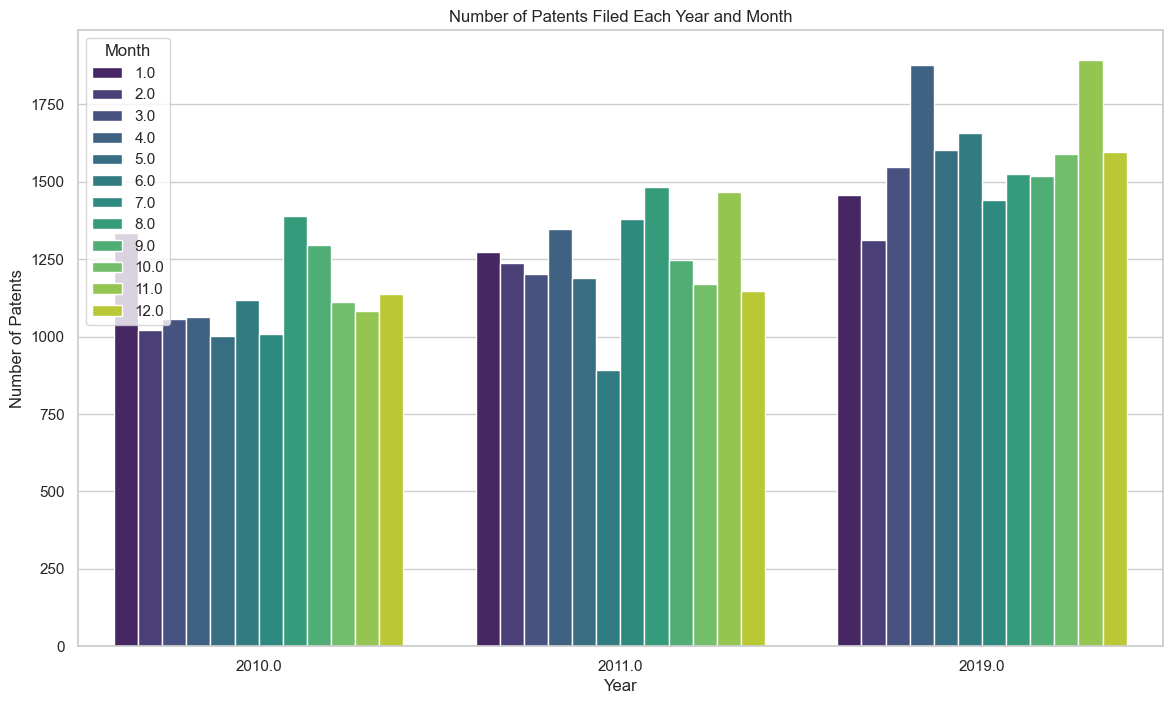

In [25]:
# Bar chart of patent filings by year and month
plt.figure(figsize=(14, 8))
sns.countplot(x='Filing Year', hue='Filing Month', data=df_all, palette='viridis')
plt.title('Number of Patents Filed Each Year and Month')
plt.xlabel('Year')
plt.ylabel('Number of Patents')
plt.legend(title='Month')
plt.show()

## Pie Chart of Patent Status Distribution

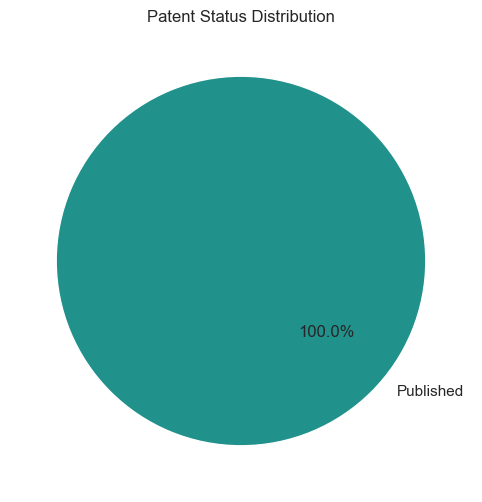

In [26]:
# Pie chart of patent status distribution
status_counts = df_all['Status'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(status_counts)))
plt.title('Patent Status Distribution')
plt.show()

## Line Chart of Monthly Patent Filings Over Time

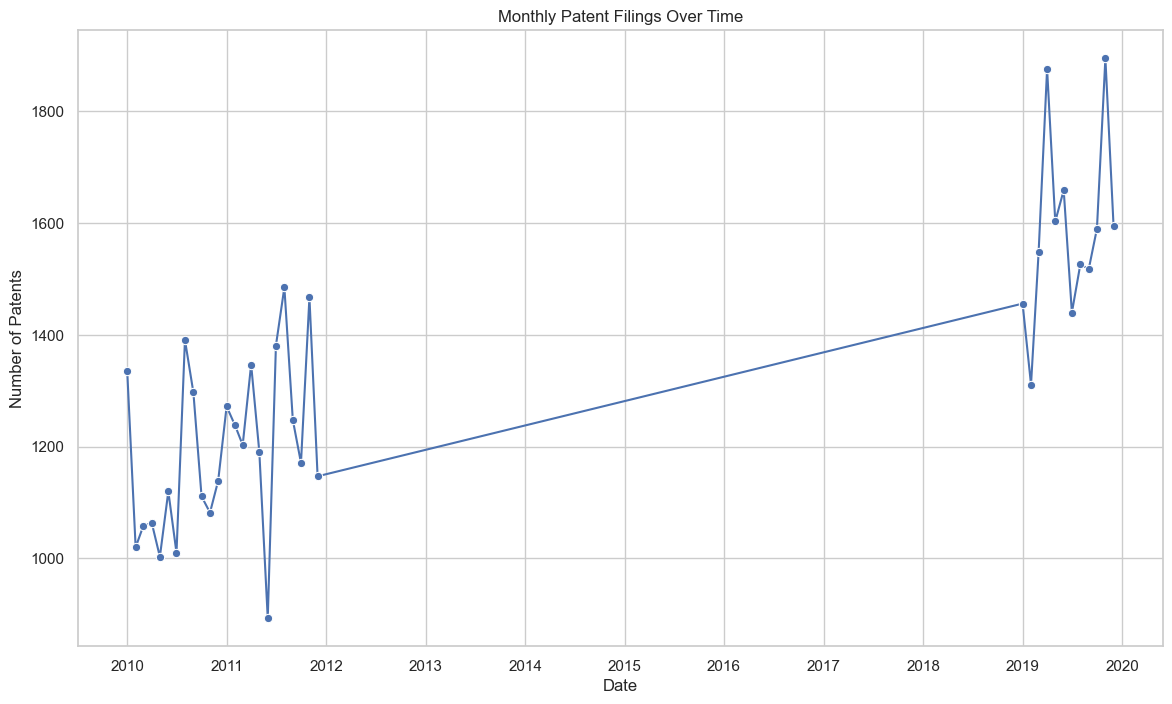

In [27]:
# Line chart of monthly patent filings over time
monthly_filings = df_all.groupby(['Filing Year', 'Filing Month']).size().reset_index(name='Counts')
monthly_filings = monthly_filings.rename(columns={'Filing Year': 'year', 'Filing Month': 'month'})
monthly_filings['Date'] = pd.to_datetime(monthly_filings[['year', 'month']].assign(day=1))

plt.figure(figsize=(14, 8))
sns.lineplot(x='Date', y='Counts', data=monthly_filings, marker='o')
plt.title('Monthly Patent Filings Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Patents')
plt.show()

## Heatmap for Correlation Analysis

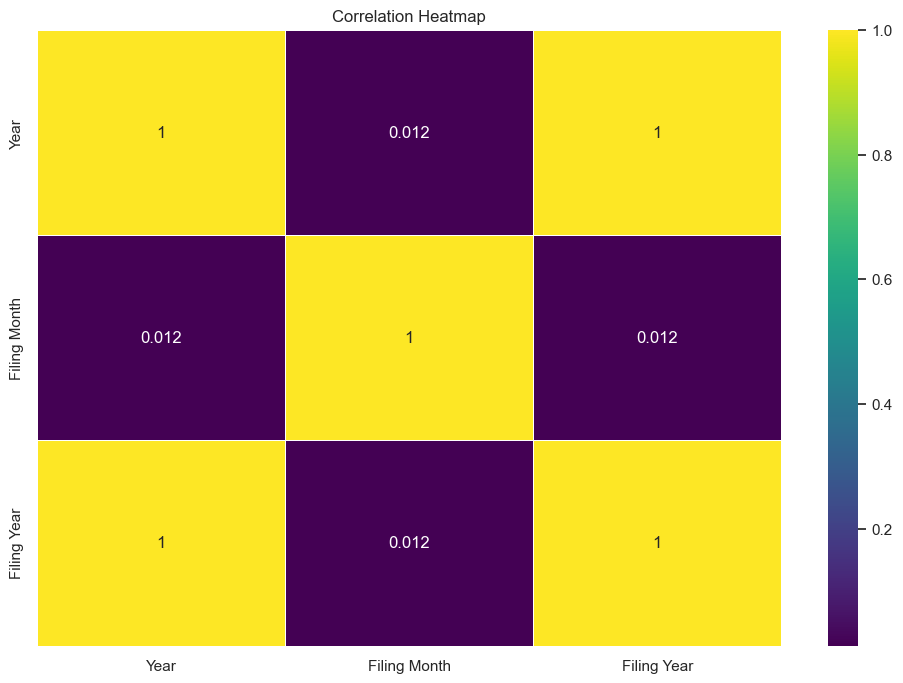

In [31]:
numeric_df = df_all.select_dtypes(include=[np.number])

# Heatmap for correlation analysis
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Bar Chart of Top Fields of Invention

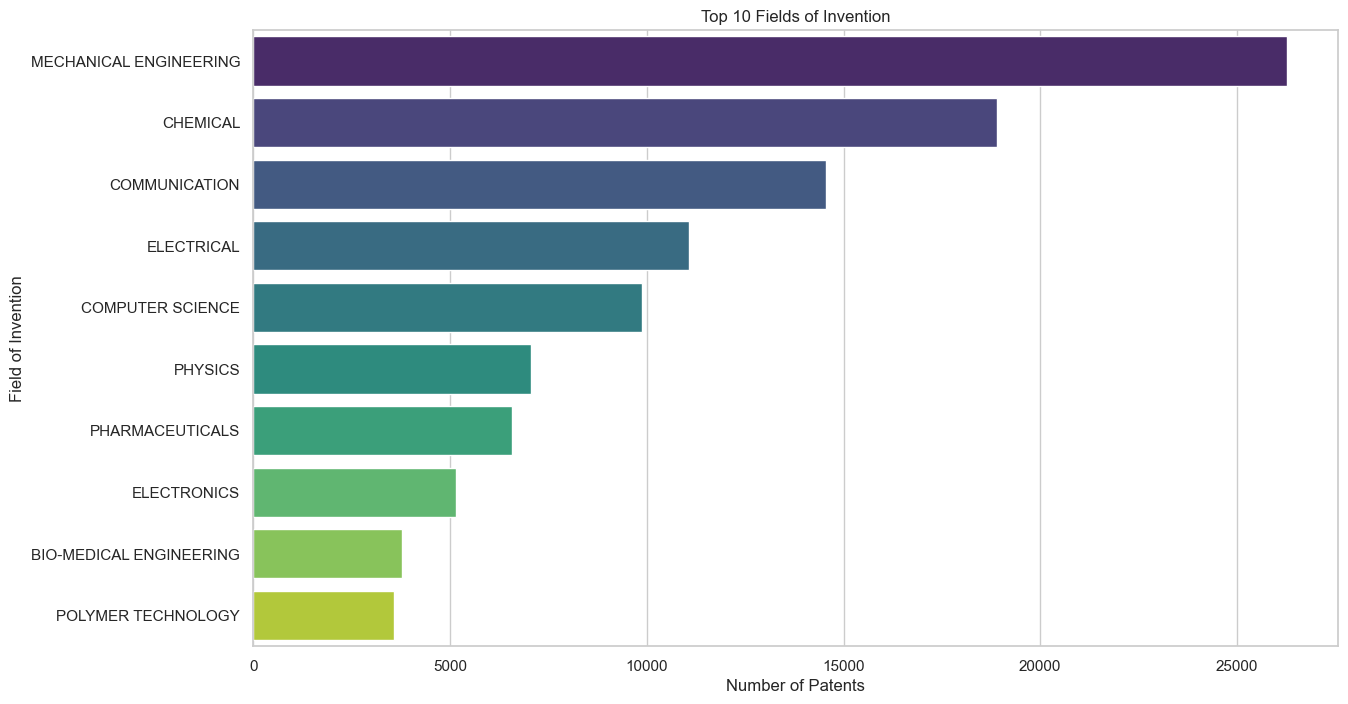

In [29]:
# Bar chart of top fields of invention
top_fields = df_all['Field Of Invention'].value_counts().head(10)

plt.figure(figsize=(14, 8))
sns.barplot(y=top_fields.index, x=top_fields.values, palette='viridis')
plt.title('Top 10 Fields of Invention')
plt.xlabel('Number of Patents')
plt.ylabel('Field of Invention')
plt.show()

## Geographical Distribution of Patents by Applicant Country

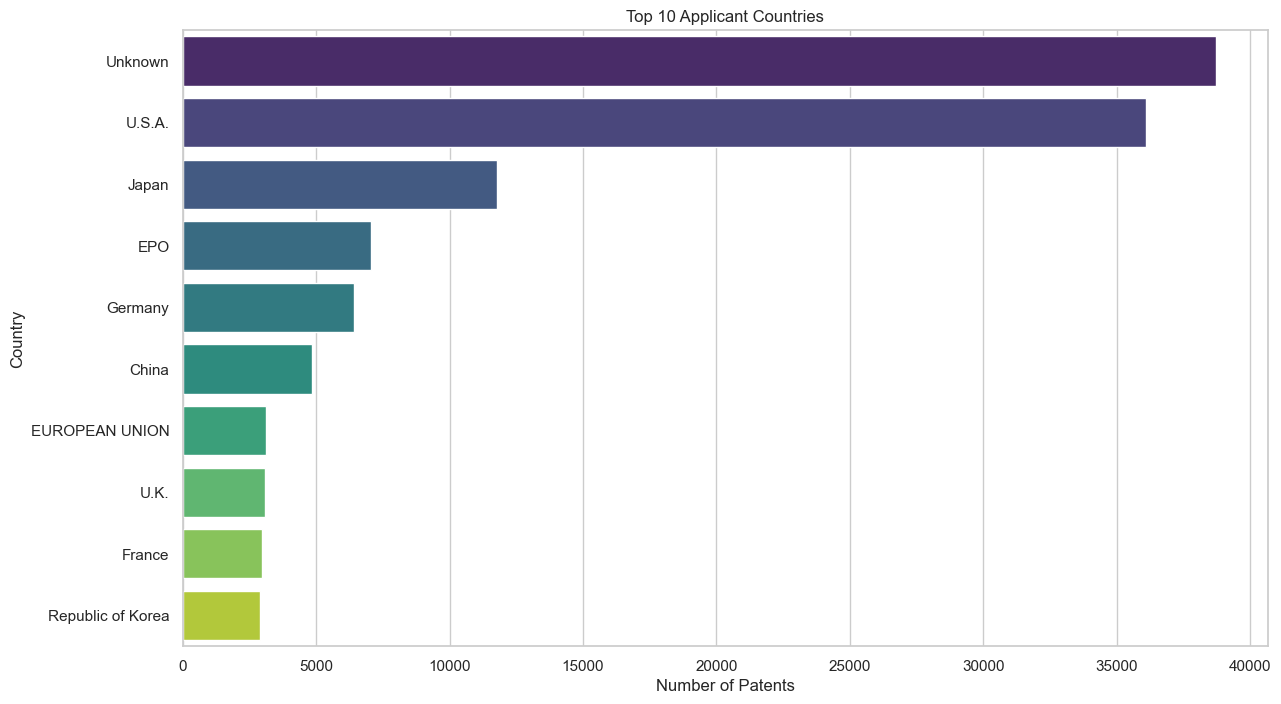

In [30]:
# Geographical distribution of patents by applicant country
applicant_countries = df_all['Priority Country'].value_counts().head(10)

plt.figure(figsize=(14, 8))
sns.barplot(y=applicant_countries.index, x=applicant_countries.values, palette='viridis')
plt.title('Top 10 Applicant Countries')
plt.xlabel('Number of Patents')
plt.ylabel('Country')
plt.show()